In [3]:
import tensorflow as tf
import numpy as np
import os 
import pandas as pd 
import keras
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from keras import optimizers
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adam    
from keras.metrics import categorical_crossentropy
from keras import backend as k

Using TensorFlow backend.


In [4]:
dataset = "Documents\\CellDNA1.csv"
DNA = pd.read_csv( dataset,header=None, )
dataset = np.genfromtxt("Documents\\CellDNA1.csv", delimiter = ',')

In [5]:
#full data set

DNA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591,0
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217,0
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111,0
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832,0
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072,7
5,233,91.407725,279.622318,40.039467,9.256891,0.972908,80.280623,233,1,17.223960,0.732704,0.524775,88.623,0
6,288,109.711806,187.788194,42.201141,9.184247,0.976031,-0.636865,288,1,19.149229,0.842105,0.738462,87.192,0
7,260,102.380769,246.411538,35.068908,12.820399,0.930781,77.954123,263,-1,18.194567,0.638821,0.465950,99.788,0
8,231,106.056277,537.207792,39.620078,8.049715,0.979143,-48.149307,232,0,17.149879,0.868421,0.316872,80.958,0
9,100,100.940000,167.050000,19.943002,8.591027,0.902457,-88.944118,100,1,11.283792,0.757576,0.584795,48.141,0


In [6]:
from scipy.stats import zscore
nz = DNA.apply(zscore)


In [7]:
nz

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.159528,-1.802006,-1.208134,0.114420,-0.135689,0.538311,-1.587426,0.135833,0.233292,0.329626,0.345115,0.652891,-0.006913,-0.385056
1,-0.939212,-1.809877,0.424363,-0.933511,-0.817247,0.019258,1.500586,-0.909580,0.233292,-1.221986,0.707287,0.843750,-0.814113,-0.385056
2,0.410247,-1.673790,0.555385,0.200447,0.134019,0.501621,1.684134,0.374384,0.233292,0.598252,-0.191898,0.555039,0.208756,-0.385056
3,-0.548385,-1.617137,1.879947,-1.059096,0.939523,-6.206504,1.253012,-0.537722,0.233292,-0.567479,0.896626,1.082702,-0.719501,-0.385056
4,0.181650,-1.525316,2.335905,0.578476,-0.417798,0.681969,-1.048779,0.156881,0.233292,0.354121,-0.402387,-1.404271,0.228457,2.597026
5,0.240643,-1.522537,0.482477,0.347408,-0.033039,0.579638,1.584386,0.213011,0.233292,0.418654,-0.363755,0.315821,0.198752,-0.385056
6,0.646218,-1.437590,-0.166369,0.460323,-0.053032,0.607806,-0.015765,0.598902,0.233292,0.835196,0.565310,1.665909,0.169415,-0.385056
7,0.439743,-1.471612,0.247829,0.087771,0.947704,0.199763,1.538380,0.423497,-0.732411,0.628650,-1.161044,-0.055839,0.427643,-0.385056
8,0.225894,-1.454555,2.302423,0.325501,-0.365277,0.635865,-0.955328,0.205995,-0.249559,0.402626,0.788792,-0.997721,0.041613,-0.385056
9,-0.740112,-1.478299,-0.312893,-0.702330,-0.216298,-0.055642,-1.762049,-0.720143,0.233292,-0.866532,-0.152540,0.695035,-0.631163,-0.385056


In [8]:
nz2 = DNA.loc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]]

In [9]:
#only colums 0-12 and z score

nz3 = nz2.apply(zscore)

In [10]:
nz2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072
5,233,91.407725,279.622318,40.039467,9.256891,0.972908,80.280623,233,1,17.223960,0.732704,0.524775,88.623
6,288,109.711806,187.788194,42.201141,9.184247,0.976031,-0.636865,288,1,19.149229,0.842105,0.738462,87.192
7,260,102.380769,246.411538,35.068908,12.820399,0.930781,77.954123,263,-1,18.194567,0.638821,0.465950,99.788
8,231,106.056277,537.207792,39.620078,8.049715,0.979143,-48.149307,232,0,17.149879,0.868421,0.316872,80.958
9,100,100.940000,167.050000,19.943002,8.591027,0.902457,-88.944118,100,1,11.283792,0.757576,0.584795,48.141


In [11]:
nz3

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.159528,-1.802006,-1.208134,0.114420,-0.135689,0.538311,-1.587426,0.135833,0.233292,0.329626,0.345115,0.652891,-0.006913
1,-0.939212,-1.809877,0.424363,-0.933511,-0.817247,0.019258,1.500586,-0.909580,0.233292,-1.221986,0.707287,0.843750,-0.814113
2,0.410247,-1.673790,0.555385,0.200447,0.134019,0.501621,1.684134,0.374384,0.233292,0.598252,-0.191898,0.555039,0.208756
3,-0.548385,-1.617137,1.879947,-1.059096,0.939523,-6.206504,1.253012,-0.537722,0.233292,-0.567479,0.896626,1.082702,-0.719501
4,0.181650,-1.525316,2.335905,0.578476,-0.417798,0.681969,-1.048779,0.156881,0.233292,0.354121,-0.402387,-1.404271,0.228457
5,0.240643,-1.522537,0.482477,0.347408,-0.033039,0.579638,1.584386,0.213011,0.233292,0.418654,-0.363755,0.315821,0.198752
6,0.646218,-1.437590,-0.166369,0.460323,-0.053032,0.607806,-0.015765,0.598902,0.233292,0.835196,0.565310,1.665909,0.169415
7,0.439743,-1.471612,0.247829,0.087771,0.947704,0.199763,1.538380,0.423497,-0.732411,0.628650,-1.161044,-0.055839,0.427643
8,0.225894,-1.454555,2.302423,0.325501,-0.365277,0.635865,-0.955328,0.205995,-0.249559,0.402626,0.788792,-0.997721,0.041613
9,-0.740112,-1.478299,-0.312893,-0.702330,-0.216298,-0.055642,-1.762049,-0.720143,0.233292,-0.866532,-0.152540,0.695035,-0.631163


In [12]:
y_train= DNA.loc[:, [13]]

In [13]:
y_train

,13
0,0
1,0
2,0
3,0
4,7
5,0
6,0
7,0
8,0
9,0


In [14]:
y1 = DNA.loc[:, [13]]

In [15]:
y1


,13
0,0
1,0
2,0
3,0
4,7
5,0
6,0
7,0
8,0
9,0


In [16]:
#variable to binary values.


y1.loc[y1[13] > 0, [13]] = 1

In [17]:
y1

,13
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [18]:
y = y1


In [19]:
y

,13
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [20]:
train_labels = np.array(y_train)
train_samples = np.array(y)

In [21]:
from sklearn.datasets import load_digits

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_labels).reshape(-1,1))

C:\Users\darius.nyaundi\Anaconda3\envs\tensorflowooo\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
for i in scaled_train_samples:
    print (i)

[0.]
[0.]
[0.]
[0.]
[0.7]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.4]
[0.]
[0.9]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.3]
[0.]
[0.]
[0.]
[0.8]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.6]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.2]
[0.]
[0.5]
[0.]
[0.]
[0.]
[0.1]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.6]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.4]
[0.]
[0.]
[0.]
[1.]
[0.3]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.2]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.5]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.7]
[0.1]
[0.]
[0.]
[0.9]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.8]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0

In [23]:
model = Sequential()
model.add(Dense(13, input_shape=(13,), activation='relu'))
model.add(Dense(6, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [25]:
#split 
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(nz2, y, test_size=0.2)

In [26]:
#Dummy variables 

y_train

,13
18,0
453,0
120,0
620,0
1153,0
913,0
88,0
833,1
154,0
844,0


In [27]:
#in keras binary_accuracy
from keras.metrics import categorical_crossentropy


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, nb_epoch=150, batch_size=10) 
model.summary()
scores = model.evaluate(X_train, y_train)
print("\n%s : %.2f%%" % (model.metrics_names[1], scores[1]*100))

C:\Users\darius.nyaundi\Anaconda3\envs\tensorflowooo\lib\site-packages\ipykernel\__main__.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/150
973/973 [==============================] - 1s 789us/step - loss: 1.3368 - acc: 0.7431
Epoch 2/150
973/973 [==============================] - 0s 150us/step - loss: 0.8302 - acc: 0.7708
Epoch 3/150
973/973 [==============================] - 0s 147us/step - loss: 0.5731 - acc: 0.8037
Epoch 4/150
973/973 [==============================] - 0s 137us/step - loss: 0.4411 - acc: 0.8273
Epoch 5/150
973/973 [==============================] - 0s 147us/step - loss: 0.4056 - acc: 0.8335
Epoch 6/150
973/973 [==============================] - 0s 154us/step - loss: 0.4099 - acc: 0.8458
Epoch 7/150
973/973 [==============================] - 0s 148us/step - loss: 0.3237 - acc: 0.8767
Epoch 8/150
973/973 [==============================] - 0s 158us/step - loss: 0.3384 - acc: 0.8510
Epoch 9/150
973/973 [==============================] - 0s 163us/step - loss: 0.3074 - acc: 0.8674
Epoch 10/150
973/973 [==============================] - 0s 149us/step - loss: 0.2777 - acc: 0.8808
Epoch 11/150
973/97

973/973 [==============================] - 0s 184us/step - loss: 0.1919 - acc: 0.9075
Epoch 84/150
973/973 [==============================] - 0s 208us/step - loss: 0.2068 - acc: 0.8993
Epoch 85/150
973/973 [==============================] - 0s 195us/step - loss: 0.1940 - acc: 0.9106
Epoch 86/150
973/973 [==============================] - 0s 201us/step - loss: 0.1971 - acc: 0.9137
Epoch 87/150
973/973 [==============================] - 0s 191us/step - loss: 0.2071 - acc: 0.9044
Epoch 88/150
973/973 [==============================] - 0s 208us/step - loss: 0.1978 - acc: 0.9147
Epoch 89/150
973/973 [==============================] - 0s 271us/step - loss: 0.2147 - acc: 0.8962 0s - loss: 0.2151 - acc: 0.8
Epoch 90/150
973/973 [==============================] - 0s 269us/step - loss: 0.2194 - acc: 0.9024
Epoch 91/150
973/973 [==============================] - 0s 188us/step - loss: 0.1937 - acc: 0.9085
Epoch 92/150
973/973 [==============================] - 0s 172us/step - loss: 0.1923 - acc: 0

In [28]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
18,363,193.206612,52.606061,54.378831,11.090284,0.978982,-33.977672,369,0,21.498511,0.610084,0.255814,141.272
453,114,128.429825,258.736842,16.269767,9.305863,0.820273,61.419751,114,1,12.047793,0.890625,0.584615,41.293
120,74,185.013513,319.148649,14.665437,7.380949,0.864118,73.602824,74,1,9.706685,0.787234,0.513889,39.077
620,84,215.380952,537.333333,14.024814,7.853726,0.828501,-14.732554,84,1,10.341766,0.954545,0.717949,32.667
1153,216,41.115741,31.449074,36.441143,8.309422,0.973656,10.164705,216,1,16.583719,0.776978,0.519231,77.028
913,145,701.910345,185.572414,26.913901,7.769050,0.957431,-6.037844,145,1,13.587484,0.843023,0.700483,54.599
88,229,649.973799,80.655022,40.385586,10.332912,0.966715,87.991617,229,1,17.075475,0.704615,0.578283,82.346
833,261,549.084291,48.061303,51.893901,7.499590,0.989502,87.203018,261,1,18.229523,0.752161,0.617021,105.461
154,436,327.013762,134.433486,42.764585,28.314479,0.749415,-60.340283,451,-4,23.561249,0.545682,0.356209,140.478
844,122,610.385246,113.532787,21.510569,9.927429,0.887133,65.334036,123,0,12.463355,0.697143,0.414966,64.342


In [29]:
y_test

,13
115,0
385,0
671,0
438,1
1206,0
369,0
1178,1
230,0
123,1
776,1


In [30]:


import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


clf = svm.SVC(kernel = 'rbf', C = 1000, probability = True).fit(X_train, y_train)
y_predicted = clf.predict(X_test)

C:\Users\darius.nyaundi\Anaconda3\envs\tensorflowooo\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [32]:
from sklearn import svm
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

C:\Users\darius.nyaundi\Anaconda3\envs\tensorflowooo\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
#percision and recall for both classes
print(classification_report(y_test, y_predicted))


import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, y_predicted)


             precision    recall  f1-score   support

          0       0.86      1.00      0.92       208
          1       1.00      0.06      0.11        36

avg / total       0.88      0.86      0.80       244



array([[208,   0],
       [ 34,   2]], dtype=int64)

In [34]:
#precision and recall in Keras

def as_keras_metric(method):
    import functools
    from keras import backend as K
    import tensorflow as tf
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        """ Wrapper for turning tensorflow metrics into keras metrics """
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper

In [35]:
precision = as_keras_metric(tf.metrics.precision)
recall = as_keras_metric(tf.metrics.recall)

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[precision, recall])

In [37]:
model.fit(X_train, y_train, nb_epoch=150, batch_size=10) 
model.summary()
scores = model.evaluate(X_train, y_train)
print("\n%s : %.2f%%" % (model.metrics_names[1], scores[1]*100))

C:\Users\darius.nyaundi\Anaconda3\envs\tensorflowooo\lib\site-packages\ipykernel\__main__.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Epoch 1/150
973/973 [==============================] - 1s 809us/step - loss: 0.2152 - precision: 0.1571 - recall: 0.9897
Epoch 2/150
973/973 [==============================] - 0s 175us/step - loss: 0.2000 - precision: 0.1659 - recall: 1.0000
Epoch 3/150
973/973 [==============================] - 0s 171us/step - loss: 0.1767 - precision: 0.1671 - recall: 1.0000
Epoch 4/150
973/973 [==============================] - 0s 167us/step - loss: 0.1859 - precision: 0.1702 - recall: 1.0000
Epoch 5/150
973/973 [==============================] - 0s 169us/step - loss: 0.1875 - precision: 0.1680 - recall: 1.0000
Epoch 6/150
973/973 [==============================] - 0s 175us/step - loss: 0.1873 - precision: 0.1696 - recall: 1.0000
Epoch 7/150
973/973 [==============================] - 0s 173us/step - loss: 0.1911 - precision: 0.1691 - recall: 1.0000
Epoch 8/150
973/973 [==============================] - 0s 175us/step - loss: 0.1873 - precision: 0.1695 - recall: 1.0000
Epoch 9/150
973/973 [===========

973/973 [==============================] - 0s 172us/step - loss: 0.1765 - precision: 0.1685 - recall: 1.0000
Epoch 69/150
973/973 [==============================] - 0s 196us/step - loss: 0.1948 - precision: 0.1686 - recall: 1.0000
Epoch 70/150
973/973 [==============================] - 0s 190us/step - loss: 0.1887 - precision: 0.1686 - recall: 1.0000
Epoch 71/150
973/973 [==============================] - 0s 191us/step - loss: 0.1821 - precision: 0.1686 - recall: 1.0000
Epoch 72/150
973/973 [==============================] - 0s 172us/step - loss: 0.1711 - precision: 0.1686 - recall: 1.0000
Epoch 73/150
973/973 [==============================] - 0s 172us/step - loss: 0.1710 - precision: 0.1685 - recall: 1.0000
Epoch 74/150
973/973 [==============================] - 0s 170us/step - loss: 0.1857 - precision: 0.1686 - recall: 1.0000
Epoch 75/150
973/973 [==============================] - 0s 192us/step - loss: 0.1748 - precision: 0.1686 - recall: 1.0000
Epoch 76/150
973/973 [===============

Epoch 134/150
973/973 [==============================] - 0s 167us/step - loss: 0.1652 - precision: 0.1685 - recall: 1.0000
Epoch 135/150
973/973 [==============================] - 0s 169us/step - loss: 0.1743 - precision: 0.1685 - recall: 1.0000
Epoch 136/150
973/973 [==============================] - 0s 163us/step - loss: 0.1706 - precision: 0.1685 - recall: 1.0000
Epoch 137/150
973/973 [==============================] - 0s 163us/step - loss: 0.1698 - precision: 0.1686 - recall: 1.0000
Epoch 138/150
973/973 [==============================] - 0s 240us/step - loss: 0.1993 - precision: 0.1685 - recall: 1.0000
Epoch 139/150
973/973 [==============================] - 0s 200us/step - loss: 0.1772 - precision: 0.1686 - recall: 1.0000
Epoch 140/150
973/973 [==============================] - 0s 180us/step - loss: 0.1648 - precision: 0.1686 - recall: 1.0000
Epoch 141/150
973/973 [==============================] - 0s 169us/step - loss: 0.1946 - precision: 0.1686 - recall: 1.0000
Epoch 142/150
97

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    



# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Compute confusion matrix
cm = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)


# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)





Confusion matrix, without normalization
[[208   0]
 [ 34   2]]
Normalized confusion matrix
[[1.   0.  ]
 [0.94 0.06]]


In [39]:
#metrics

import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)

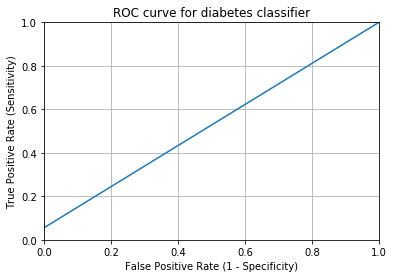

In [43]:
#roc plot

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

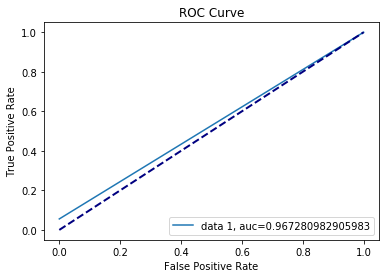

Accuracy 0.860655737704918


In [57]:
#roc plot more details with auc
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,0]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)

plt.figure()
lw = 2
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("Accuracy", metrics.accuracy_score(y_test, y_predicted))

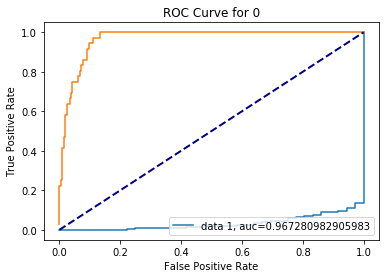

Accuracy 0.860655737704918


In [65]:
y_pred_proba1 = model.predict_proba(X_test)[::,]
auc = metrics.roc_auc_score(y_test, y_pred_proba1)
fpr2, tpr2, thresholds = metrics.roc_curve(y_test,y_pred_proba1,)


y_pred_proba = model.predict_proba(X_test)[::,]
auc = metrics.roc_auc_score(y_test, y_pred_proba1)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba, pos_label=0)
plt.figure()
lw = 2
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot(fpr2,tpr2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 0')
plt.legend(loc="lower right")
plt.show()

print("Accuracy", metrics.accuracy_score(y_test,  y_predicted))

In [42]:
STOP HERE ............................................................................

SyntaxError: invalid syntax (<ipython-input-42-f10caa7de2f8>, line 1)

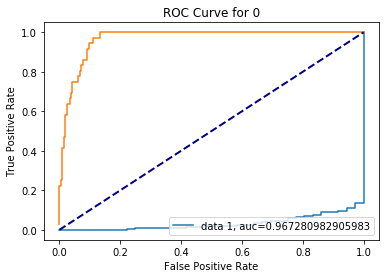

AttributeError: module 'sklearn.metrics' has no attribute 'accuracy_scorey_test'

In [70]:
y_pred_proba1 = model.predict_proba(X_test)[::,]
auc = metrics.roc_auc_score(y_test, y_pred_proba1)
fpr2, tpr2, thresholds = metrics.roc_curve(y_test,y_pred_proba1,)


y_pred_proba = model.predict_proba(X_test)[::,]
auc = metrics.roc_auc_score(y_test, y_pred_proba1)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba, pos_label=0)
plt.figure()
lw = 2
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot(fpr2,tpr2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 0')
plt.legend(loc="lower right")
plt.show()

print("Accuracy", metrics.accuracy_scorey_test, prediction)

<Figure size 432x288 with 0 Axes>

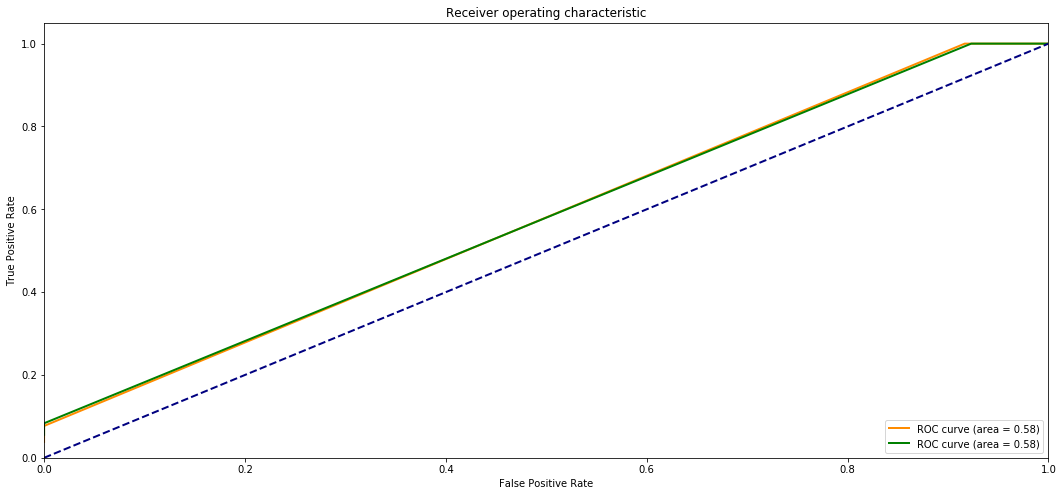

In [72]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

 
pred_0 = clf.predict_proba(X_test)[:,0]
pred_1 = clf.predict_proba(X_test)[:,1]

 
 
# Compute ROC curve and ROC area for each class
n_classes = 2
fpr_0, tpr_0, threshold_0 = roc_curve(y_test, pred_0,0)
roc_auc_0 = auc(fpr_0, tpr_0)
fpr_1, tpr_1, threshold_1 = roc_curve(y_test, pred_1,1)
roc_auc_1 = auc(fpr_1, tpr_1)

 
 
plt.figure()
lw = 2
fig, ax = plt.subplots(figsize=(18,8))

plt.plot(fpr_0, tpr_0, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_0)
plt.plot(fpr_1, tpr_1, color='green',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_1)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()